In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from shapely.geometry import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from visualenvironment import VisualEnvironment

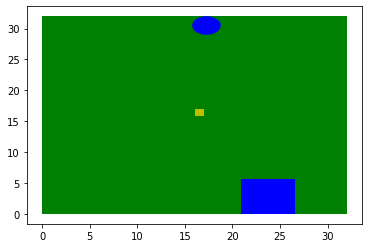

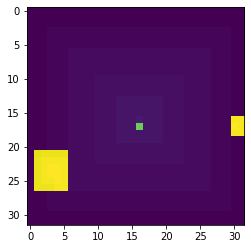

In [3]:
env1 = VisualEnvironment()
env1.plot_geometry()
env1.plot_data()

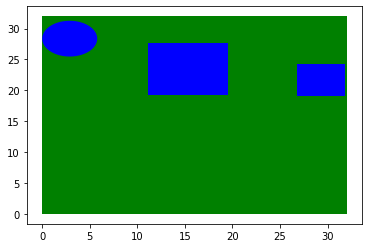

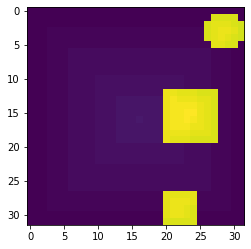

In [4]:
env2 = VisualEnvironment(includeRobot=False)
env2.plot_geometry()
env2.plot_data()

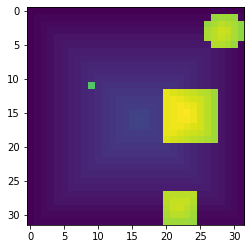

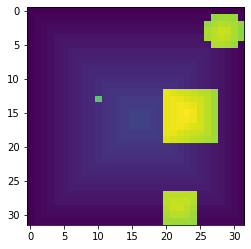

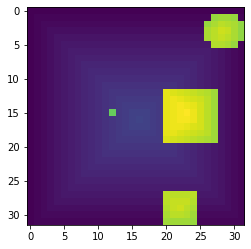

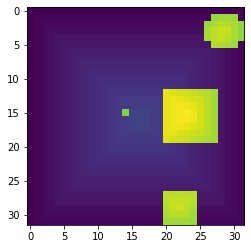

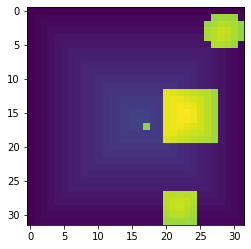

In [8]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

envs = env2.generate_trajectory(length=5)
for i in range(len(envs)):
#     plt.subplot(3, 4, i+1)
    envs[i].build_data()
    fig = plt.figure()
    plt.imshow(envs[i].data)
    plt.show()
#     print ('Environment {}'.format(i))
#     print (envs[i].data)

np.set_printoptions(**opt)

In [ ]:
#### Additional exploratory code for saving matplotlib figure as numpy array...

In [44]:
print (fig)

Figure(432x288)


In [ ]:
fig.canvas.draw()
w,h = fig.canvas.get_width_height()
print ('{} x {}'.format(w, h))
buf = fig.canvas.tostring_argb()
print (len(buf))
print (buf[0:10])
buf_arr = np.frombuffer(buf, dtype=np.uint8)
print (buf_arr.shape)
print (buf_arr[0:10])

buf = fig.canvas.print_to_buffer()
print (buf)

In [36]:
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

In [38]:
fig_arr = fig2data(fig)
fig_arr.shape

/Users/pradeepkadubandi/.local/share/virtualenvs/LSBMP-L2RRT-AlqjJP_-/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


(432, 288, 4)

In [ ]:
# Exploratory code for playing with normal distribution 

[[7.09989678 7.17745381 7.25300792 ... 7.25300792 7.17745381 7.09989678]
 [7.17745381 7.25853003 7.33772349 ... 7.33772349 7.25853003 7.17745381]
 [7.25300792 7.33772349 7.42070762 ... 7.42070762 7.33772349 7.25300792]
 ...
 [7.25300792 7.33772349 7.42070762 ... 7.42070762 7.33772349 7.25300792]
 [7.17745381 7.25853003 7.33772349 ... 7.33772349 7.25853003 7.17745381]
 [7.09989678 7.17745381 7.25300792 ... 7.25300792 7.17745381 7.09989678]]
9.890122675365303
7.099896779598069


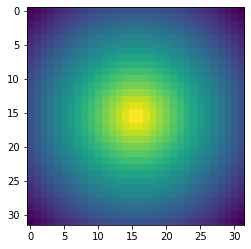

In [36]:
data = 5 * np.zeros((32,32), dtype=np.float)
center = np.array([15.5, 15.5])
var = 32
peak = 10
it = np.nditer(data, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    distance_squared = np.sum((center-it.multi_index) ** 2)  # Circular shape
    # distance_squared = np.max(np.abs(center-it.multi_index)) ** 2   # Square shape
    prob = np.exp(-distance_squared/(2*var)) # / np.sqrt(2 * np.pi * var)
    data[it.multi_index] += peak * prob
    it.iternext()
    
plt.imshow(data, cmap=default_cmap)
print (data)
print (np.max(data))
print (np.min(data))